In [ ]:
# import necessary libraries

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

from wordcloud import WordCloud

import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

from nltk.corpus import stopwords
import re


# for modeling 

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
# Mount drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load data 

df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/NLP project 4/data.csv")

In [ ]:
# check first 5 records 

df.head()

,tweet_id,tweet,sentiment
0,1701,#sxswnui #sxsw #apple defining language of tou...,1
1,1851,Learning ab Google doodles! All doodles should...,1
2,2689,one of the most in-your-face ex. of stealing t...,2
3,4525,This iPhone #SXSW app would b pretty awesome i...,0
4,3604,Line outside the Apple store in Austin waiting...,1


In [ ]:
# Drop unnecessary column

df=df.drop(['tweet_id'], axis=1)
df

,tweet,sentiment
0,#sxswnui #sxsw #apple defining language of tou...,1
1,Learning ab Google doodles! All doodles should...,1
2,one of the most in-your-face ex. of stealing t...,2
3,This iPhone #SXSW app would b pretty awesome i...,0
4,Line outside the Apple store in Austin waiting...,1
...,...,...
7269,@mention Google plze Tammi. I'm in middle of ...,1
7270,RT @mention ÷¼ Are you all set? ÷_ {link} ÷...,1
7271,RT @mention Aha! Found proof of lactation room...,1
7272,We just launched our iPad app at #SXSW! Get al...,1


In [ ]:
# Shape of the data 

df.shape

(7274, 2)

In [ ]:
# Info of the data 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7274 entries, 0 to 7273
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet      7273 non-null   object
 1   sentiment  7274 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 113.8+ KB


In [ ]:
# Describing the data  

df.describe()

,sentiment
count,7274.000000
mean,1.299148
std,0.607829
min,0.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,3.000000


In [ ]:
# Checking for null values

df.isna().sum()

tweet        1
sentiment    0
dtype: int64

In [ ]:
# Dropping null values 

df=df.dropna()
df.isna().sum()

tweet        0
sentiment    0
dtype: int64

In [ ]:
# Drop rows of tweet column

df = df.dropna(subset=['tweet'])

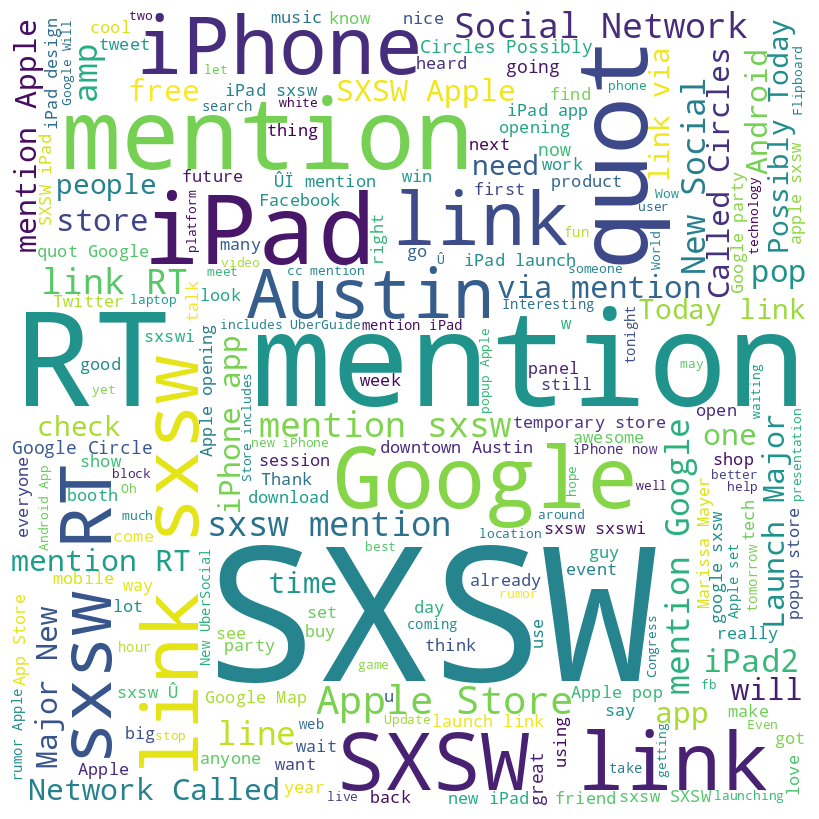

In [ ]:
# Plot Word Cloud  

text = ' '.join(df['tweet'])
wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate(text)

plt.figure(figsize=(8,8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

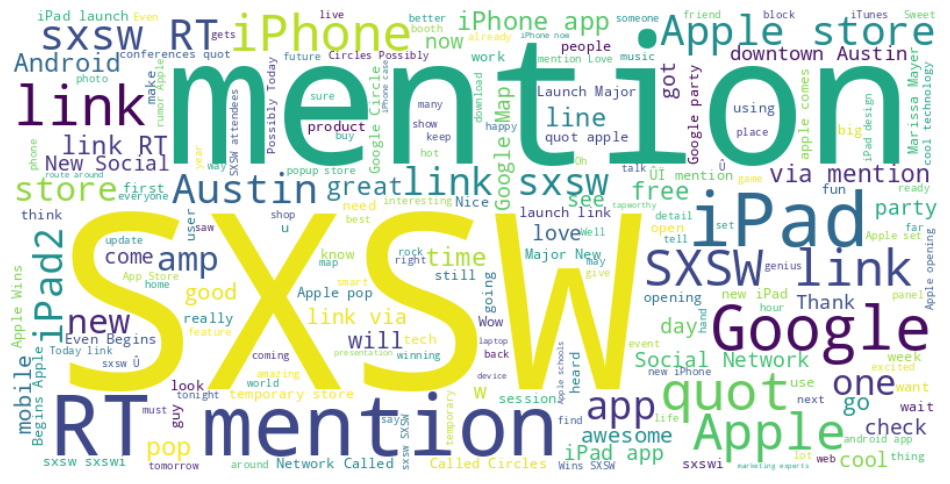

In [ ]:
# Plot Word cloud of positive tweets 


# Filter for positive tweets
positive_tweets = df[df['sentiment'] == 2]['tweet']

# Combine all the positive tweets into a single string
text = ' '.join(positive_tweets)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Plot the word cloud
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


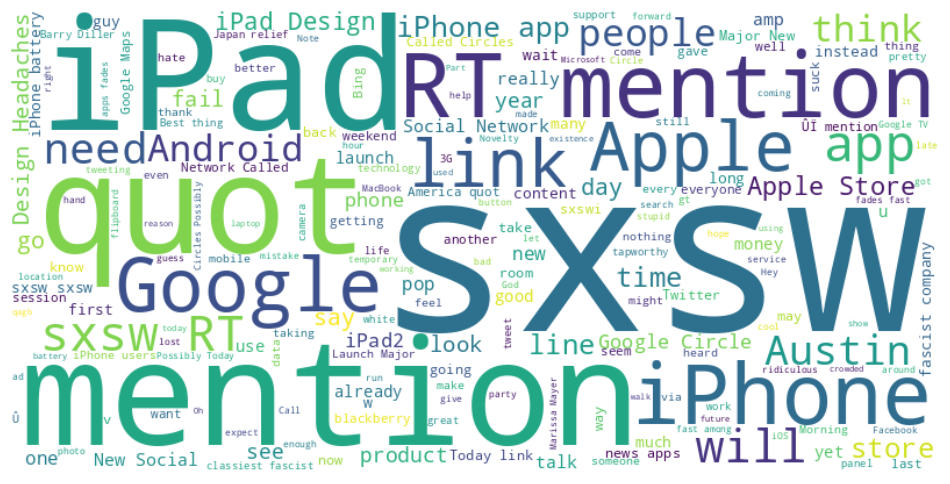

In [ ]:
# Plot Word cloud of negative tweets 


# Filter for positive tweets
positive_tweets = df[df['sentiment'] == 0]['tweet']

# Combine all the positive tweets into a single string
text = ' '.join(positive_tweets)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Plot the word cloud
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


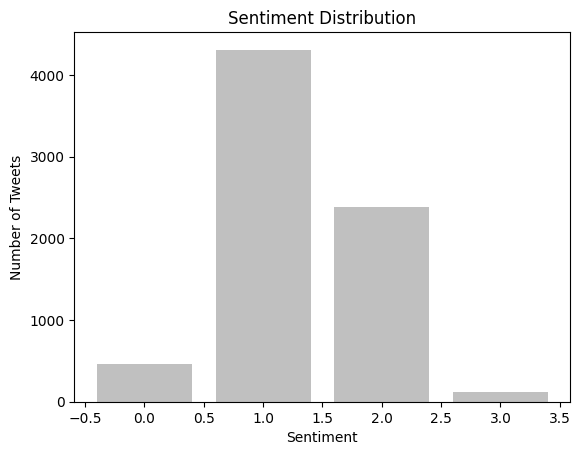

In [ ]:
# Bar Chart for Sentiment Distribution 

# Calculate the number of tweets for each sentiment
sentiment_counts = df['sentiment'].value_counts()

# Plot the bar chart
plt.bar(sentiment_counts.index, sentiment_counts.values, color='silver')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.show()

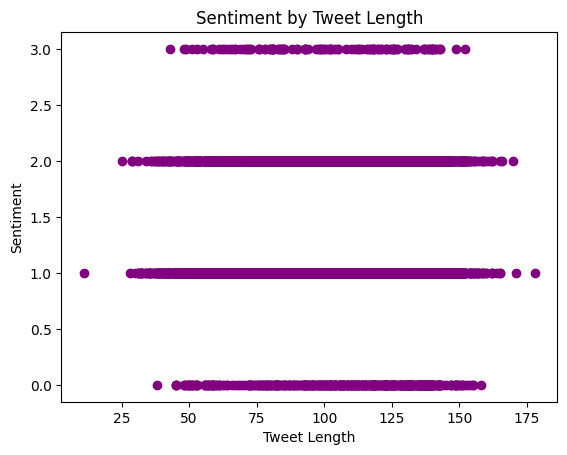

In [ ]:
# Scatter plot between tweet length and sentiment

# Calculate the length of each tweet
tweet_lengths = df['tweet'].apply(len)

# Plot the scatter plot
plt.scatter(tweet_lengths, df['sentiment'], color = 'purple')
plt.title('Sentiment by Tweet Length')
plt.xlabel('Tweet Length')
plt.ylabel('Sentiment')
plt.show()


In [ ]:
# Lemmatization  

def lemmatize_text(text):
    lemmatizer = WordNetLemmatizer()
    tokens = word_tokenize(text)
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return ' '.join(lemmatized_tokens)

In [ ]:
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
df['tweet_lemmatized'] = df['tweet'].apply(lemmatize_text)

In [ ]:
# Check value of tweet and tweet_lemmatized

print(df[['tweet', 'tweet_lemmatized']].head())

                                               tweet  \
0  #sxswnui #sxsw #apple defining language of tou...   
1  Learning ab Google doodles! All doodles should...   
2  one of the most in-your-face ex. of stealing t...   
3  This iPhone #SXSW app would b pretty awesome i...   
4  Line outside the Apple store in Austin waiting...   

                                    tweet_lemmatized  
0  # sxswnui # sxsw # apple defining language of ...  
1  Learning ab Google doodle ! All doodle should ...  
2  one of the most in-your-face ex . of stealing ...  
3  This iPhone # SXSW app would b pretty awesome ...  
4  Line outside the Apple store in Austin waiting...  


In [ ]:
# removing punctuations 

df['tweet_lemmatized'].replace('[^a-zA-Z]', " ", regex=True, inplace=True)
df.head()

,tweet,sentiment,tweet_lemmatized
0,#sxswnui #sxsw #apple defining language of tou...,1,sxswnui sxsw apple defining language of ...
1,Learning ab Google doodles! All doodles should...,1,Learning ab Google doodle All doodle should ...
2,one of the most in-your-face ex. of stealing t...,2,one of the most in your face ex of stealing ...
3,This iPhone #SXSW app would b pretty awesome i...,0,This iPhone SXSW app would b pretty awesome ...
4,Line outside the Apple store in Austin waiting...,1,Line outside the Apple store in Austin waiting...


In [ ]:
# remove meaningless words from tweet_lemmatized column

def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    words = re.findall('\w+', text)
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)


In [ ]:
nltk.download('stopwords')
df['tweet_clean'] = df['tweet_lemmatized'].apply(remove_stopwords)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Check value of tweet and tweet_clean
print(df[['tweet', 'tweet_clean']].head())

                                               tweet  \
0  #sxswnui #sxsw #apple defining language of tou...   
1  Learning ab Google doodles! All doodles should...   
2  one of the most in-your-face ex. of stealing t...   
3  This iPhone #SXSW app would b pretty awesome i...   
4  Line outside the Apple store in Austin waiting...   

                                         tweet_clean  
0  sxswnui sxsw apple defining language touch dif...  
1  Learning ab Google doodle doodle light funny a...  
2  one face ex stealing show yr RT mention quot S...  
3  iPhone SXSW app would b pretty awesome n crash...  
4  Line outside Apple store Austin waiting new iP...  


In [ ]:
df['tweet_lemmatized'][0]

'  sxswnui   sxsw   apple defining language of touch with different dialect becoming smaller'

In [ ]:
df['tweet_clean'][0]

'sxswnui sxsw apple defining language touch different dialect becoming smaller'

In [ ]:
# delete most frequent words form tweet_clean

from collections import Counter

text = ' '.join(df['tweet_clean'].astype(str))
tokens = text.split()

token_counts = Counter(tokens)

n = 5  # number of most frequent words to delete
most_common_tokens = [token for token, count in token_counts.most_common(n)]

for word in most_common_tokens:
    df['tweet_remove'] = df['tweet_clean'].str.replace(word, '')



In [ ]:
# lets check difference 
df['tweet_clean'][10]

'RT mention Official SXSW App SXSW GO bit ly hmiiGa android iphone ipad'

In [ ]:
df['tweet_remove'][10]

' mention Official SXSW App SXSW GO bit ly hmiiGa android iphone ipad'

In [ ]:
df.head()

,tweet,sentiment,tweet_lemmatized,tweet_clean,tweet_remove
0,#sxswnui #sxsw #apple defining language of tou...,1,sxswnui sxsw apple defining language of ...,sxswnui sxsw apple defining language touch dif...,sxswnui sxsw apple defining language touch dif...
1,Learning ab Google doodles! All doodles should...,1,Learning ab Google doodle All doodle should ...,Learning ab Google doodle doodle light funny a...,Learning ab Google doodle doodle light funny a...
2,one of the most in-your-face ex. of stealing t...,2,one of the most in your face ex of stealing ...,one face ex stealing show yr RT mention quot S...,one face ex stealing show yr mention quot SXS...
3,This iPhone #SXSW app would b pretty awesome i...,0,This iPhone SXSW app would b pretty awesome ...,iPhone SXSW app would b pretty awesome n crash...,iPhone SXSW app would b pretty awesome n crash...
4,Line outside the Apple store in Austin waiting...,1,Line outside the Apple store in Austin waiting...,Line outside Apple store Austin waiting new iP...,Line outside Apple store Austin waiting new iP...


In [ ]:
# Converting string into lower case

df['tweet_remove'] = df['tweet_remove'].str.lower()

In [ ]:
df['tweet_remove']

0       sxswnui sxsw apple defining language touch dif...
1       learning ab google doodle doodle light funny a...
2       one face ex stealing show yr  mention quot sxs...
3       iphone sxsw app would b pretty awesome n crash...
4       line outside apple store austin waiting new ip...
                              ...                        
7269    mention google plze tammi middle sxsw crazines...
7270     mention set link edchat musedchat sxsw sxswi ...
7271     mention aha found proof lactation room excuse...
7272    launched ipad app sxsw get detail first editio...
7273    next fin serv battle v apple goog mobile opera...
Name: tweet_remove, Length: 7273, dtype: object

In [ ]:
# Removing some common words 

words = ['sxsw', 'sxswnui', 'rt', 'link', 'ipad', 'mention'] # list of words to remove

# use .str.replace() to remove the common words
for word in words:
    df['tweet_remove'] = df['tweet_remove'].str.replace(word, '')

# remove extra spaces that may have been created due to removing the words
df['tweet_remove'] = df['tweet_remove'].str.strip()

In [ ]:
df['tweet_remove']

0       nui  apple defining language touch different d...
1       learning ab google doodle doodle light funny a...
2       one face ex stealing show yr   quot  apple sch...
3       iphone  app would b pretty awesome n crash eve...
4             line outside apple store austin waiting new
                              ...                        
7269    google plze tammi middle  craziness everything...
7270                  set  edchat musedchat  i newtwitter
7271    aha found proof lactation room excuse quot mot...
7272         launched  app  get detail first edition free
7273    next fin serv battle v apple goog mobile opera...
Name: tweet_remove, Length: 7273, dtype: object

In [ ]:
df.head()

,tweet,sentiment,tweet_lemmatized,tweet_clean,tweet_remove
0,#sxswnui #sxsw #apple defining language of tou...,1,sxswnui sxsw apple defining language of ...,sxswnui sxsw apple defining language touch dif...,nui apple defining language touch different d...
1,Learning ab Google doodles! All doodles should...,1,Learning ab Google doodle All doodle should ...,Learning ab Google doodle doodle light funny a...,learning ab google doodle doodle light funny a...
2,one of the most in-your-face ex. of stealing t...,2,one of the most in your face ex of stealing ...,one face ex stealing show yr RT mention quot S...,one face ex stealing show yr quot apple sch...
3,This iPhone #SXSW app would b pretty awesome i...,0,This iPhone SXSW app would b pretty awesome ...,iPhone SXSW app would b pretty awesome n crash...,iphone app would b pretty awesome n crash eve...
4,Line outside the Apple store in Austin waiting...,1,Line outside the Apple store in Austin waiting...,Line outside Apple store Austin waiting new iP...,line outside apple store austin waiting new


In [ ]:
# drop unnecessary columns

df=df.drop(['tweet','tweet_lemmatized', 'tweet_clean'], axis=1)

In [ ]:
df.head()

,sentiment,tweet_remove
0,1,nui apple defining language touch different d...
1,1,learning ab google doodle doodle light funny a...
2,2,one face ex stealing show yr quot apple sch...
3,0,iphone app would b pretty awesome n crash eve...
4,1,line outside apple store austin waiting new


In [ ]:
# rename column

df = df.rename(columns={'tweet_remove': 'tweet'})

In [ ]:
df.head()

,sentiment,tweet
0,1,nui apple defining language touch different d...
1,1,learning ab google doodle doodle light funny a...
2,2,one face ex stealing show yr quot apple sch...
3,0,iphone app would b pretty awesome n crash eve...
4,1,line outside apple store austin waiting new


In [ ]:
# Modelling  

#Random Forest 


# create a CountVectorizer object to convert text into numerical features
vectorizer = CountVectorizer()

# create X and y variables
X = vectorizer.fit_transform(df['tweet'])
y = df['sentiment']

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# create a Random Forest classifier object
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# fit the classifier to the training data
rf.fit(X_train, y_train)

# make predictions on the testing data
y_pred = rf.predict(X_test)



In [ ]:
# calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy*100)



Accuracy: 68.93470790378007


In [ ]:
# Evaluate the model 

from sklearn.metrics import classification_report, confusion_matrix

# print classification report
print(classification_report(y_test, y_pred))

# print confusion matrix
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.62      0.20      0.31        88
           1       0.69      0.90      0.78       849
           2       0.71      0.45      0.55       495
           3       0.10      0.04      0.06        23

    accuracy                           0.69      1455
   macro avg       0.53      0.40      0.42      1455
weighted avg       0.68      0.69      0.66      1455

[[ 18  57  11   2]
 [  7 762  75   5]
 [  2 269 222   2]
 [  2  16   4   1]]
